-2020.11.21：将和沪深300指数比对改为直接取涨幅最高的percent

#### 等权分配改为可赋值的权值

-2020.11.24:将选出的行业名录入df

In [1]:
import numpy as np
import pandas as pd

In [14]:
class Para:
    path_data = 'weekly.xlsx'
    range_data = range(3,13)
    hold_time = range(3,13)
    percent = 0.2
para = Para()

In [3]:
number = 29
new_columns = range(number)
data_processed = pd.read_excel(para.path_data, 'Sheet1', index_col=None, na_values=['NA'],names = new_columns, header=0) #待处理数据
data_processed = data_processed.dropna(axis=0)

In [15]:
def function(range_data,hold_time,percent):
    value_df = np.zeros([len(range_data),len(hold_time)])
    value_df = pd.DataFrame(data = value_df, index = range_data, columns = hold_time)
    value_df.index.name = '样本时间'
    value_df.columns.name = '持股时间'

    for index in range_data:

        for columns in hold_time:

            #循环次数
            count = int((data_processed.shape[0]-2)/(index+columns))
            for i in range(count):
                section = int(2+(index+columns)*i)
                
                #均值
                mean_data = np.mean(data_processed.iloc[section:section+index,1:])
                mean_data = mean_data.sort_values(ascending = False)
                selected_data = mean_data.iloc[:int(mean_data.shape[0]*percent)]
                selected_names = selected_data.index
                
                
                names = selected_names.to_numpy() 

                selected_data = data_processed[data_processed.index[names-1]]
                selected_data = np.mean(selected_data.iloc[section+index:section+index+columns,:])
                selected_data = np.mean(selected_data.T)
                value_df[columns][index] = selected_data
    return value_df

a = function(para.range_data,para.hold_time,para.percent)

In [12]:
a #策略平均涨跌幅

持股时间,3,4,5,6,7,8,9,10,11,12,...,15,16,17,18,19,20,21,22,23,24
样本时间,,,,,,,,,,,,,,,,,,,,,
3,0.936750,0.645281,0.908994,0.972332,0.380739,-0.514365,0.218731,-0.712043,-0.479684,-0.092822,...,1.144034,-0.107292,1.950712,1.090968,1.273071,1.100274,1.377190,1.408156,0.948880,0.609888
4,2.145360,2.216720,2.090321,0.895202,-0.836559,-0.542338,0.064857,0.332730,-0.390980,-0.274102,...,0.331642,2.200731,1.388024,1.123537,1.273071,1.532602,1.630563,0.829447,0.459365,0.861922
5,2.552505,2.310560,1.717394,-0.753023,-1.282781,-0.638673,0.284527,-0.335623,0.462576,-0.327071,...,2.340223,1.273623,1.148983,1.164995,1.607563,1.552385,0.310114,0.458715,0.867108,0.836238
6,0.866572,2.138615,-0.082448,-1.227370,-0.547140,-0.513721,0.722039,1.119172,-0.676443,0.450506,...,1.266791,0.992459,1.148983,1.829107,2.103406,0.781320,0.202785,0.830072,1.116325,1.733408
7,1.719218,0.649260,-1.814107,0.422396,-1.177778,1.048405,0.746026,-0.723940,-0.748674,0.770832,...,1.048794,0.992459,1.573225,2.106633,0.510246,-0.486924,1.341199,1.268274,1.443883,1.037777
8,0.057501,-2.223639,1.380288,-1.000905,0.973817,1.379173,0.053767,-0.016887,1.237913,2.154668,...,1.163735,1.265675,2.202677,0.598561,-0.069124,1.302158,1.133603,1.169363,0.499699,1.077564
9,-1.573514,0.233477,-1.236268,1.423460,1.409164,1.096450,0.268142,0.591906,2.327539,0.526304,...,1.264621,2.207719,1.089207,0.171928,0.902514,0.663481,0.949241,0.814052,0.842608,0.790795
10,1.503043,-1.853287,1.387492,1.085538,0.619238,-0.586903,0.934114,2.247711,-0.563090,0.030165,...,2.397811,1.149331,-0.102610,1.074898,0.955349,0.861384,0.549177,0.754787,0.651803,1.060270
11,-1.573514,1.661054,0.643238,0.955780,-1.207736,0.940541,2.558897,-0.016887,0.142588,0.030165,...,1.232881,-0.153385,1.481721,0.701159,0.924200,0.763823,0.798257,0.285225,1.102583,0.436058


In [6]:
#画图
import matplotlib.pyplot as plt

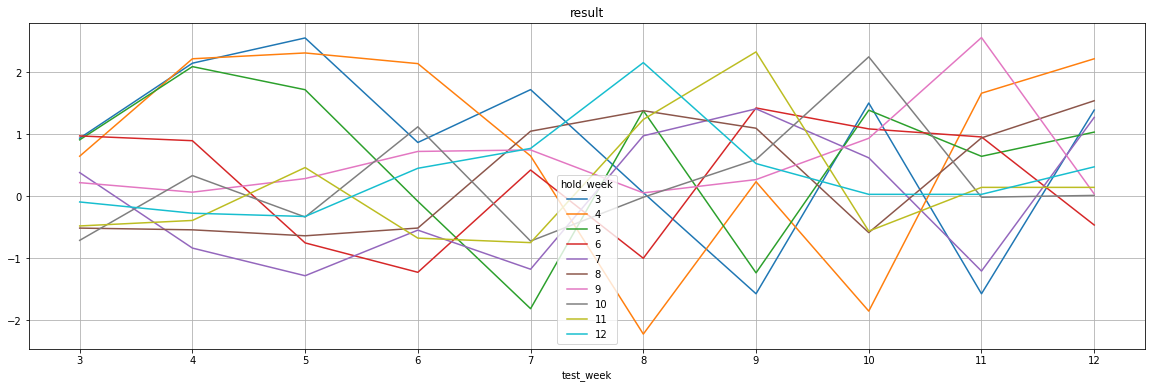

In [16]:
a.index.name = 'test_week'
a.columns.name = 'hold_week'
result = a.plot(title = 'result',figsize = (20,6),grid = True,xticks = para.range_data,legend = True)